# Imports

## Libraries and Packages

In [1]:
# Essential
import pandas as pd
import numpy as np

# For testing model's effectiveness
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For visualization
import matplotlib.pyplot as plt

## Dataset

Datasource: [Experimental Data on Tunnel Diode](https://www.kaggle.com/datasets/raktim711/experimental-data-on-tunnel-diode)

This is a real-life dataset which has been obtained while performing an experiment on tunnel diode at ***St. Xavier's College, Kolkata***. The tunnel diode is an experiment which aims to demonstrate the Quantum Tunelling effect.

For a detailed theory refer to Tunnel Diode Theory

**V: The voltage across the diode (in volt)**

**I: The current across the diode (in milliamperes)**

In [2]:
PATH = "../Data/"

In [3]:
df = pd.read_csv(PATH + "TunneldiodeTotal.csv")

In [4]:
df = df.sort_values(by="V", ascending=True)

In [5]:
df.head(10)

,V,I
0,0.007,1.40
34,0.008,1.40
35,0.009,1.63
37,0.010,1.74
36,0.010,1.68
1,0.010,1.74
38,0.011,1.82
39,0.012,1.97
40,0.013,2.09
41,0.014,2.20


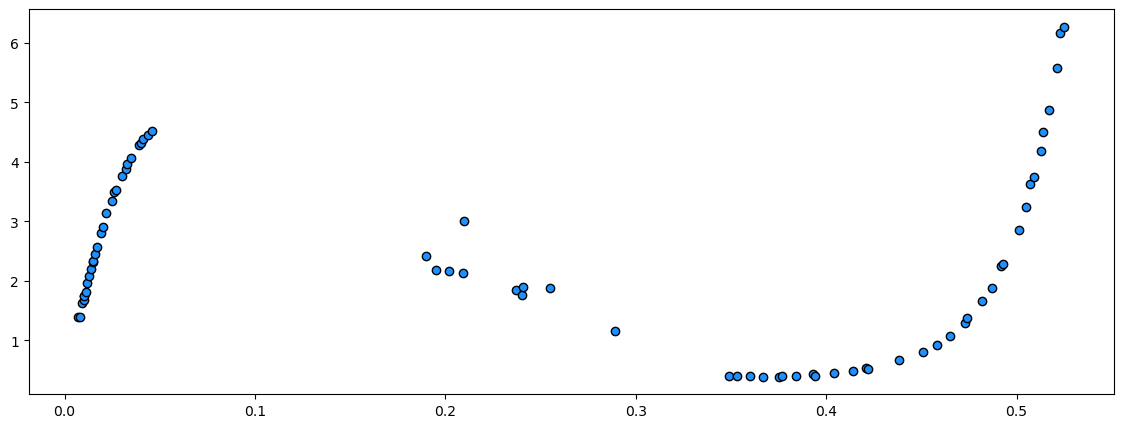

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))

ax.scatter(x=df["V"],
           y=df["I"],
           marker="o",
           c="dodgerblue",
           edgecolor="k",
           label="Test"
          );

# Interpolation

## Creating x and y variable

In [7]:
x=df["V"]
y=df["I"]

## Using np.polyfit

### Determining the best coefficients

In [8]:
coef_2 = np.polyfit(x, y, deg=2)
coef_4 = np.polyfit(x, y, deg=4)
coef_6 = np.polyfit(x, y, deg=6)

### Creating polynomial models based on deg & coefficients found

In [9]:
poly_2 = np.poly1d(coef_2)
poly_4 = np.poly1d(coef_4)
poly_6 = np.poly1d(coef_6)

### Predicting possible values based on the models generated

In [10]:
y_poly2 = poly_2(x)
y_poly4 = poly_4(x)
y_poly6 = poly_6(x)

### Plotting the results

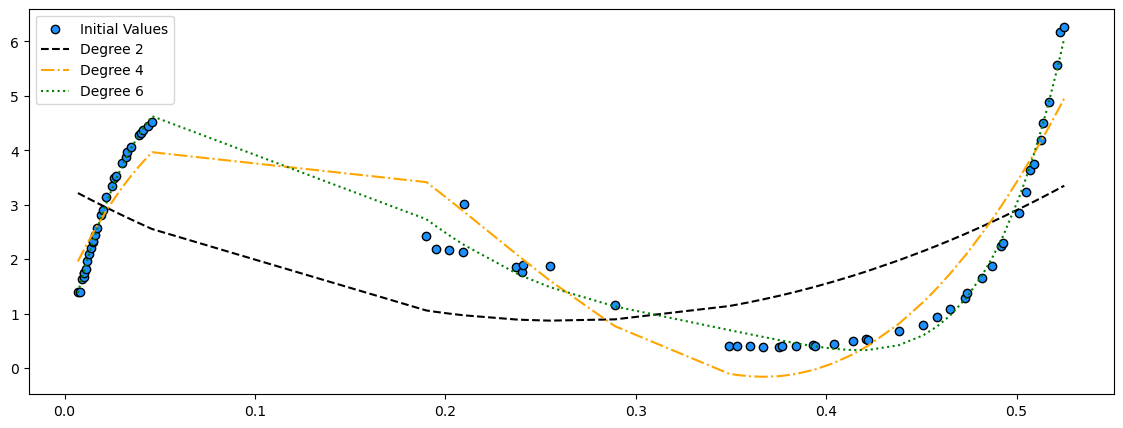

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))


ax.scatter(x, y, marker="o", c="dodgerblue", edgecolor="k", label="Initial Values")

ax.plot(x, y_poly2, c="black", label="Degree 2", linestyle="--")
ax.plot(x, y_poly4, c="orange", label="Degree 4", linestyle="-.")
ax.plot(x, y_poly6, c="green", label="Degree 6", linestyle=":")

ax.legend();

# Model Evauluation

In [12]:
def evaluate_result(y_actual, y_pred):
    """
    Evaluate the result based on several cost functions

    Paramaters
    ----------
    y_actual: Pandas Series
    y_pred: Pandas Series

    Returns
    -------
    Pandas DataFrame
    
    """
    predictions = []

    predictions.append(mean_squared_error(y_actual, y_pred))
    predictions.append(mean_absolute_error(y_actual, y_pred))
    predictions.append(r2_score(y_actual, y_pred))

    return pd.DataFrame(predictions, index=["MSE", "MAE", "R2"], columns=["Result"]).T

## Cost Functions

### Mean Squared Error (MSE)
**Definition:** MSE measures the average of the squares of the errors—that is, the average squared difference between the actual values and the predicted values.

**Formula:** $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

**Interpretation:** Since the errors are squared, larger errors have a more significant impact on the MSE. This makes MSE sensitive to outliers.

**Use Cases:** MSE is often used in regression analysis because it heavily penalizes larger errors, making it ideal when you want to emphasize large mistakes.

### Mean Absolute Error (MAE)
**Definition:** MAE measures the average of the absolute differences between the actual values and the predicted values.

**Formula:** $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

**Interpretation:** MAE is less sensitive to outliers than MSE because it treats all errors equally.

**Use Cases:** MAE is useful when you want a straightforward measure of average model error without disproportionately penalizing larger errors.

### R-squared (R²)
**Definition:** R², also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

Formula:** $$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}i)^2}{\sum{i=1}^{n} (y_i - \bar{y})^2} $$

**Where** 
y
ˉ
 is the mean of the actual values.

**Interpretation:** R² values range from 0 to 1. A higher R² indicates a better fit, meaning more of the variance is explained by the model.

**Use Cases:** R² is often used to assess the goodness of fit for regression models. It's particularly useful when comparing different models to see which one better explains the variability in the data.

## Results

### Polyfit (Deg=2)

In [13]:
evaluate_result(y, y_poly2)

,MSE,MAE,R2
Result,1.547459,1.113124,0.30953


### Polyfit (Deg=4)

In [14]:
evaluate_result(y, y_poly4)

,MSE,MAE,R2
Result,0.298059,0.46877,0.867007


### Polyfit (Deg=6)

In [15]:
evaluate_result(y, y_poly6)

,MSE,MAE,R2
Result,0.031558,0.123712,0.985919


## Choosing the Right Cost Function:

### MSE:

**Best for:** Scenarios where larger errors should be heavily penalized. It’s ideal when the cost of large errors is particularly high (e.g., financial forecasting).

**Avoid if:** Your data has many outliers, as they will have a significant impact on the MSE.

### MAE:

**Best for:** Cases where you want a more interpretable error metric that is robust to outliers. It’s suitable for applications where all errors should be treated equally.

**Avoid if:** You need a metric that emphasizes larger errors more significantly.

### R²:

**Best for:** Assessing how well your model explains the variability of the data, particularly useful in comparison between different models.

**Avoid if:** You're dealing with non-linear models or cases where a high R² doesn’t necessarily mean a good predictive performance (always validate with additional metrics).

## Summary:

**MSE:** Sensitive to outliers, emphasizes large errors.

**MAE:** Treats all errors equally, robust to outliers.

**R²:** Measures explanatory power, useful for model comparison.